In [2]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import augment_image

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

### Prepare all basic variable

In [3]:
path_source = os.environ.get('PATH_DATASET_DESTINATION')
scenario_names = ['scenario_1', 'scenario_2', 'scenario_3', 'scenario_4', 'scenario_5']
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
fold = 'fold_2'
labels_name = ['normal', 'glaukoma']
aug_type = ['h_flip', 'v_flip', 'bright']
image_size = {'rimone': (300,300),
            'g1020': (240,300),
            'refuge': (300,300),
            'papila': (200,300)}

In [4]:
# getting the path of the dataset
path_dataset_src = {}
for scenario in scenario_names:
    for dataset in dataset_names:
            path_dataset_src[scenario + '_'
                            + dataset + '_'
                            + fold] = os.path.join(path_source,
                                                    scenario,
                                                    dataset,
                                                    fold,
                                                    'train')
del scenario, dataset

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255
)

### Visualize the Image
#### Scenario 1
**Condition:**
- no augmentation
- rgb color
- no clahe

In [6]:
s1_datagen = {}
s1_col_mode = 'rgb'
s1_aug = 'no'

In [7]:
for dataset in dataset_names:
    for label in labels_name:
        print(f'Load {dataset} {label}...')
        s1_datagen[dataset + '_'
                    + label] = datagen.flow_from_directory(
                        path_dataset_src[scenario_names[0] + '_'
                                        + dataset + '_'
                                        + fold],
                        target_size=image_size[dataset],
                        color_mode=s1_col_mode,
                        class_mode='binary',
                        classes=[label]
                    )
del dataset, label

Load rimone normal...
Found 218 images belonging to 1 classes.
Load rimone glaukoma...
Found 121 images belonging to 1 classes.
Load g1020 normal...
Found 506 images belonging to 1 classes.
Load g1020 glaukoma...
Found 208 images belonging to 1 classes.
Load refuge normal...


Found 756 images belonging to 1 classes.
Load refuge glaukoma...
Found 84 images belonging to 1 classes.
Load papila normal...
Found 232 images belonging to 1 classes.
Load papila glaukoma...
Found 109 images belonging to 1 classes.


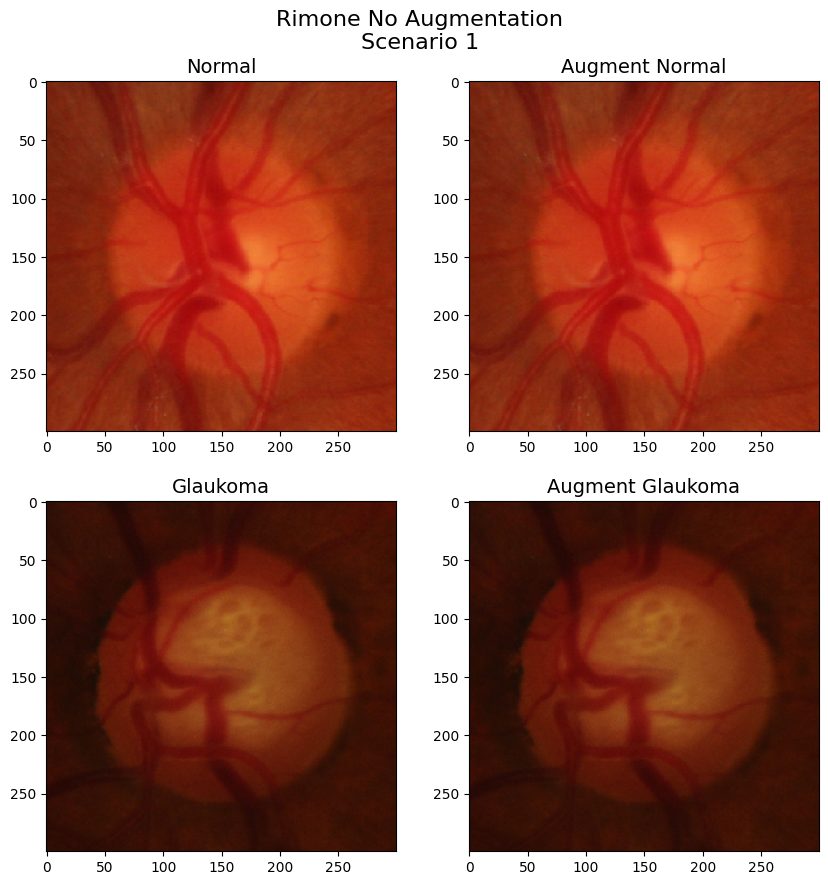

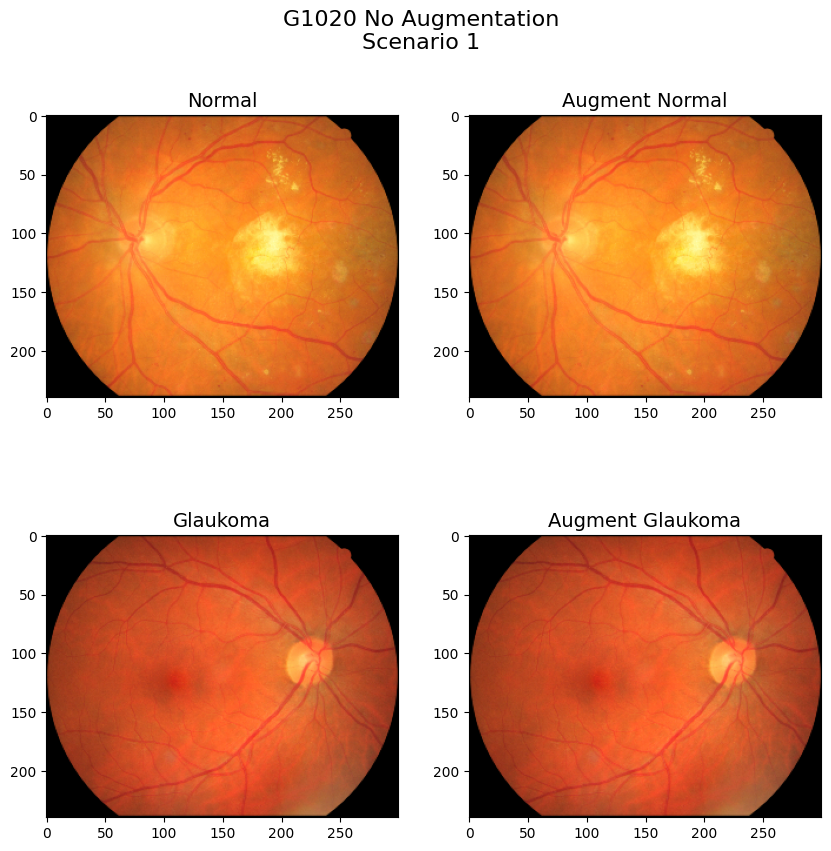

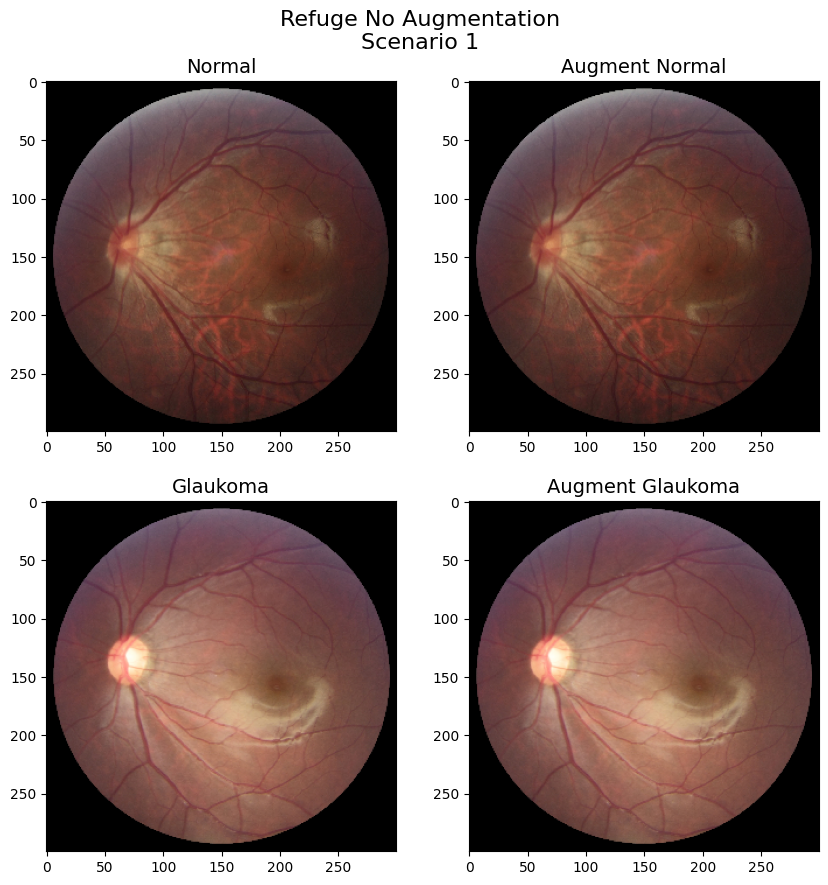

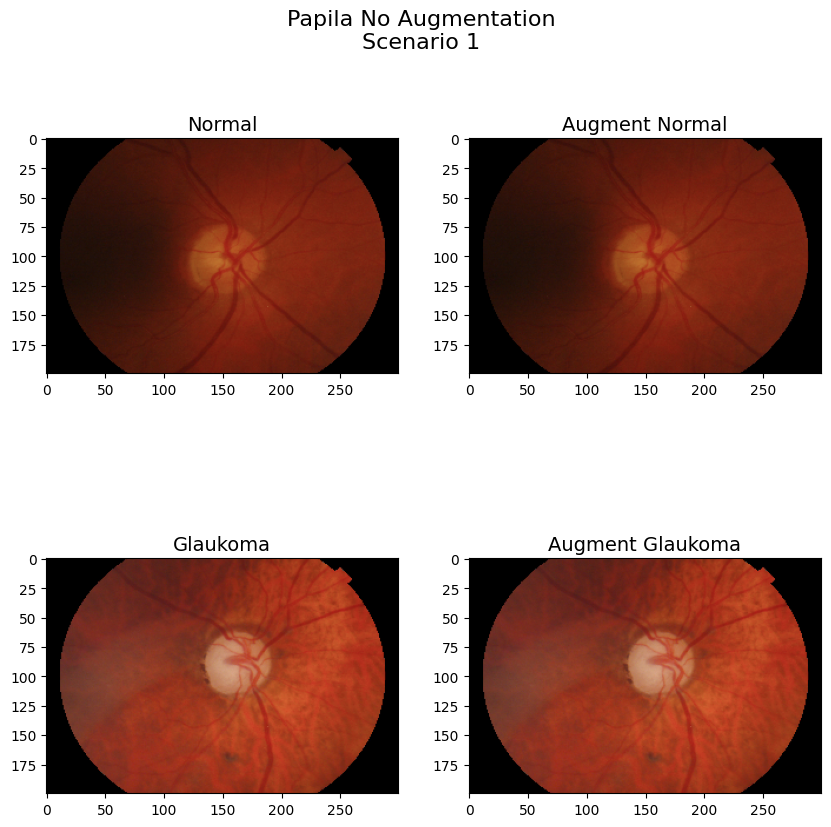

In [9]:
augment_image.visualize_img(datasets=dataset_names,
                                labels=labels_name,
                                datagen=s1_datagen,
                                aug=s1_aug,
                                clahe=False,
                                col_mode=s1_col_mode,
                                scenario=scenario_names[0])

#### Scenario 2
**Conditon:**
- basic augmentation
- rgb color
- no clahe

#### Scenario 3
**Condition:**
- basic augmentation
- rgb color
- clahe

#### Scenario 4
**Condition:**
- basic augmentation
- grayscale
- no clahe

#### Scenario 5
**Condition:**
- basic augmentation
- grayscale
- clahe